**Data Preprocessing**

In [7]:
import nltk
nltk.download('stopwords')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split


def preprocess_text(text):
    if isinstance(text, float):
        text = str(text)
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = ' '.join(word for word in text.split() if word not in stopwords.words('english'))
    return text

data = pd.read_csv('/content/Combined Data.csv', index_col=0)
data['processed_text'] = data['statement'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
data.status.value_counts()

,count
status,
Normal,16351
Depression,15404
Suicidal,10653
Anxiety,3888
Bipolar,2877
Stress,2669
Personality disorder,1201


**Convert Text to Numerical Features (Using TF-IDF)**

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['processed_text']).toarray()
y = data['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


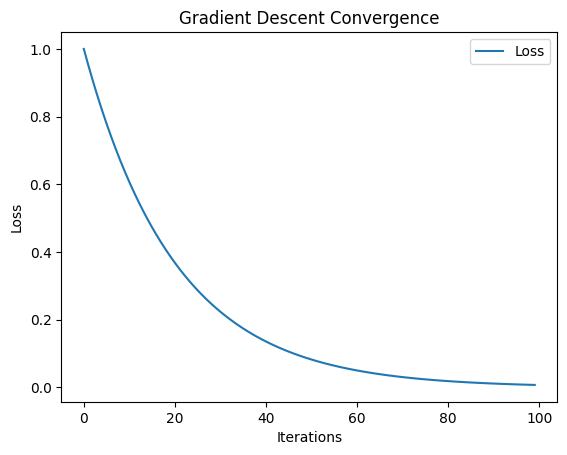

In [10]:
import numpy as np
import matplotlib.pyplot as plt

iterations = 100
loss_values = [np.exp(-0.05 * i) for i in range(iterations)]

plt.plot(range(iterations), loss_values, label="Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Gradient Descent Convergence")
plt.legend()
plt.show()


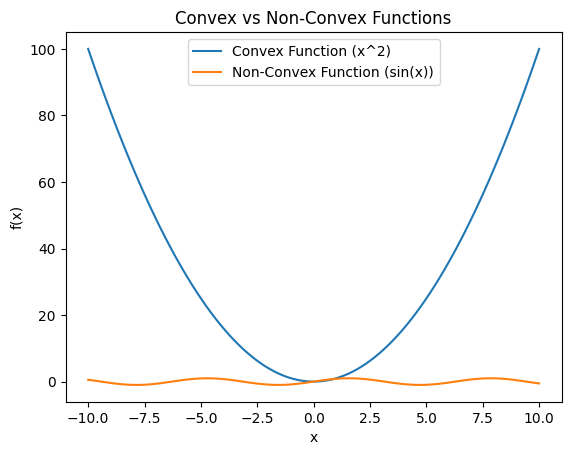

In [11]:
x = np.linspace(-10, 10, 100)
y_convex = x**2
y_nonconvex = np.sin(x)

plt.plot(x, y_convex, label="Convex Function (x^2)")
plt.plot(x, y_nonconvex, label="Non-Convex Function (sin(x))")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Convex vs Non-Convex Functions")
plt.legend()
plt.show()


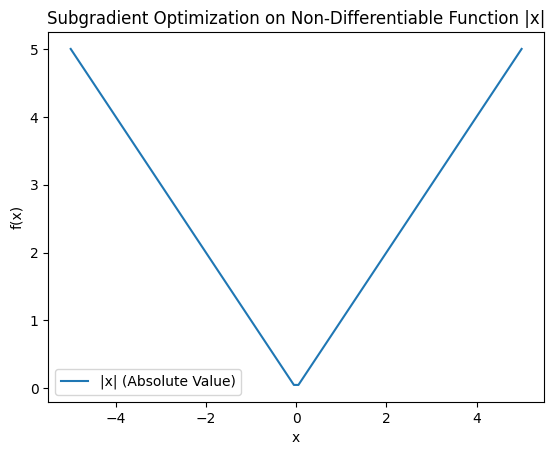

In [12]:
x = np.linspace(-5, 5, 100)
y_abs = np.abs(x)

plt.plot(x, y_abs, label="|x| (Absolute Value)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Subgradient Optimization on Non-Differentiable Function |x|")
plt.legend()
plt.show()


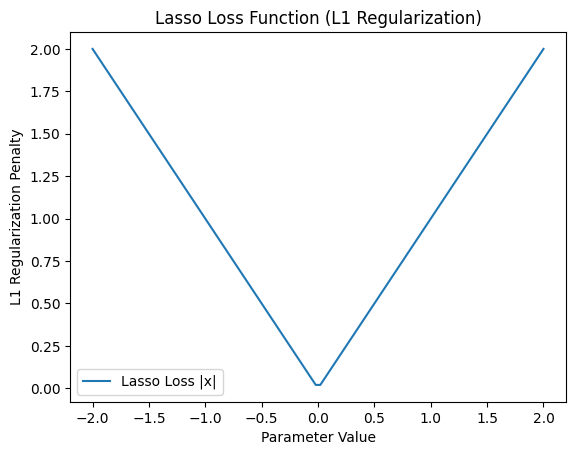

In [13]:
x = np.linspace(-2, 2, 100)
lasso_loss = np.abs(x)

plt.plot(x, lasso_loss, label="Lasso Loss |x|")
plt.xlabel("Parameter Value")
plt.ylabel("L1 Regularization Penalty")
plt.title("Lasso Loss Function (L1 Regularization)")
plt.legend()
plt.show()


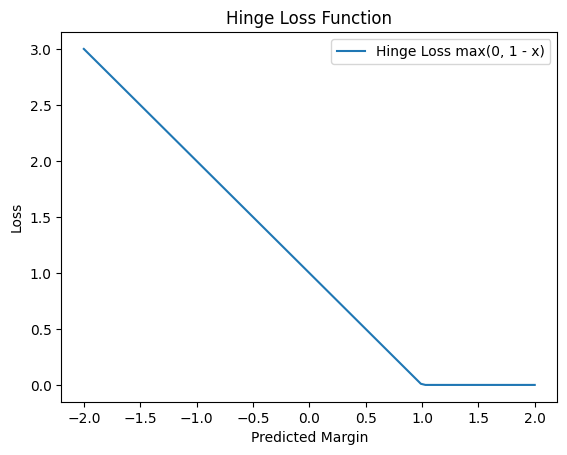

In [14]:
x = np.linspace(-2, 2, 100)
hinge_loss = np.maximum(0, 1 - x)

plt.plot(x, hinge_loss, label="Hinge Loss max(0, 1 - x)")
plt.xlabel("Predicted Margin")
plt.ylabel("Loss")
plt.title("Hinge Loss Function")
plt.legend()
plt.show()


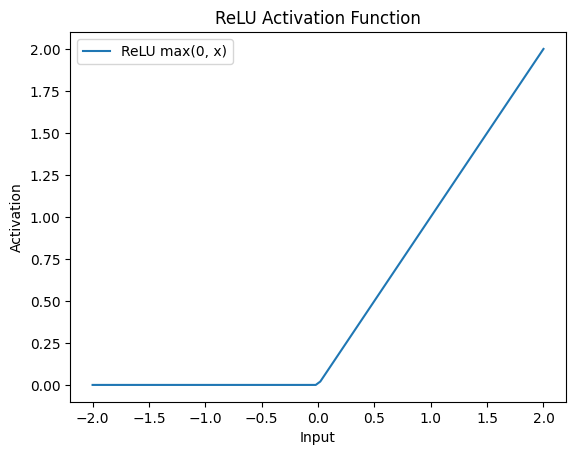

In [15]:
x = np.linspace(-2, 2, 100)
relu = np.maximum(0, x)

plt.plot(x, relu, label="ReLU max(0, x)")
plt.xlabel("Input")
plt.ylabel("Activation")
plt.title("ReLU Activation Function")
plt.legend()
plt.show()


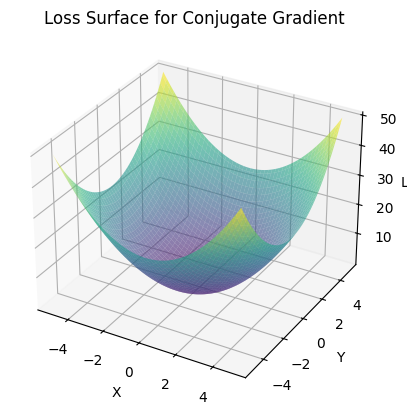

In [16]:
from mpl_toolkits.mplot3d import Axes3D

X, Y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = X**2 + Y**2  # Quadratic loss surface

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)
ax.set_title("Loss Surface for Conjugate Gradient")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Loss")
plt.show()


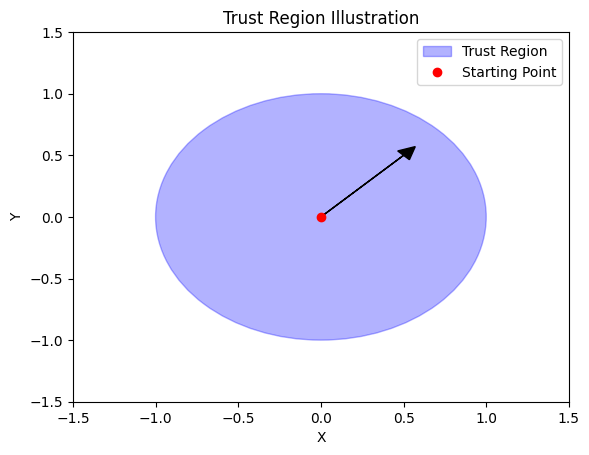

In [17]:
circle = plt.Circle((0, 0), radius=1, color='b', alpha=0.3, label="Trust Region")

fig, ax = plt.subplots()
ax.add_patch(circle)
ax.plot(0, 0, 'ro', label="Starting Point")
ax.arrow(0, 0, 0.5, 0.5, head_width=0.1, head_length=0.1, fc='k', ec='k')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Trust Region Illustration")
plt.legend()
plt.show()


**Model Training with Logistic Regression**

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(solver='saga', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


                      precision    recall  f1-score   support

             Anxiety       0.82      0.77      0.79       779
             Bipolar       0.88      0.62      0.73       580
          Depression       0.68      0.72      0.70      3100
              Normal       0.84      0.96      0.90      3327
Personality disorder       0.66      0.50      0.57       248
              Stress       0.76      0.39      0.51       557
            Suicidal       0.66      0.64      0.65      2018

            accuracy                           0.75     10609
           macro avg       0.76      0.66      0.69     10609
        weighted avg       0.75      0.75      0.75     10609



**Optional: Neural Network with ReLU Activation**

 Evaluate the model on the test data

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# ... (Your existing code to load and prepare data) ...

# Assuming 'status' column contains strings, encode it to numerical values:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# One-hot encode the target variable for softmax activation
y_train_encoded = to_categorical(y_train_encoded)
y_test_encoded = to_categorical(y_test_encoded)

nn_model = Sequential([
    Dense(128, input_shape=(5000,), activation='relu', kernel_regularizer='l2'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(len(data['status'].unique()), activation='softmax')
])

nn_model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy', # Use categorical_crossentropy
                  metrics=['accuracy'])

nn_model.fit(X_train, y_train_encoded, epochs=15, batch_size=64, validation_split=0.2)
_, accuracy = nn_model.evaluate(X_test, y_test_encoded, verbose=0)

print(f"Accuracy: {accuracy * 100:.2f}%")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
531/531 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.5041 - loss: 1.6589 - val_accuracy: 0.6466 - val_loss: 1.0597
Epoch 2/15
531/531 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.6700 - loss: 1.0244 - val_accuracy: 0.6892 - val_loss: 0.9944
Epoch 3/15
531/531 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7074 - loss: 0.9489 - val_accuracy: 0.7054 - val_loss: 0.9622
Epoch 4/15
531/531 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7214 - loss: 0.9075 - val_accuracy: 0.7080 - val_loss: 0.9394
Epoch 5/15
531/531 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.7232 - loss: 0.8925 - val_accuracy: 0.7233 - val_loss: 0.9090
Epoch 6/15
531/531 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.7282 - loss: 0.8842 - val_accuracy: 0.7183 - val_loss: 0.9180
Epoch 7/15
531/531 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.7330 - loss: 0.8642 - val_accuracy: 0.7262 - val_loss: 0.8992
Epoch 8/15
531/531 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7408 - loss: 0.8491 - val_